In [ ]:

!pip install scikit-learn  # Install scikit-learn if not already installed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dataset=pd.read_csv('/content/diabetes1.csv')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:

df = pd.DataFrame(dataset)
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
X = df.drop(['BloodPressure', 'Outcome'], axis=1)
y = df['BloodPressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 8.289385238806748
Mean Squared Error (MSE): 115.58315652785902
R-squared (R²): 0.2060737410012684


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
df = pd.DataFrame(dataset)
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")


Logistic Regression Performance:
Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluation
print("K-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


K-Nearest Neighbors Performance:
Accuracy: 0.6948051948051948
Confusion Matrix:
[[79 20]
 [27 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



Logistic Regression Performance:
Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

AUC: 0.8146923783287419


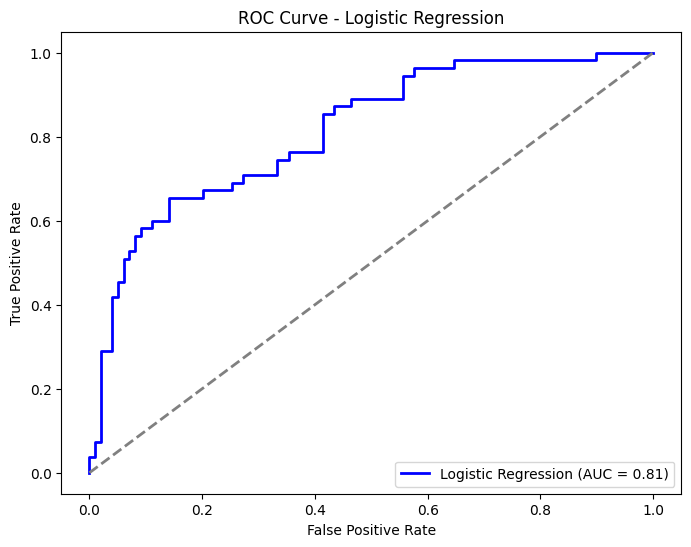


K-Nearest Neighbors Performance:
Accuracy: 0.6948051948051948
Confusion Matrix:
[[79 20]
 [27 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

AUC: 0.7640955004591368


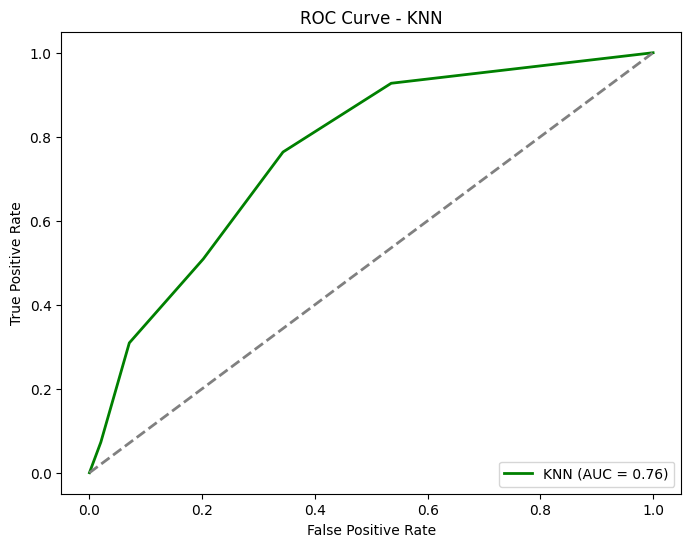

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Evaluation
print("Logistic Regression Performance:")
# Predictions for Logistic Regression
y_pred_lr = model_lr.predict(X_test_scaled)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix:\n{conf_matrix_lr}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")

# ROC Curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, model_lr.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC: {roc_auc_lr}")

# Plot ROC Curve for Logistic Regression
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# K-Nearest Neighbors Evaluation
print("\nK-Nearest Neighbors Performance:")
# Predictions for KNN
y_pred_knn = model_knn.predict(X_test_scaled)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix:\n{conf_matrix_knn}")

# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

# ROC Curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, model_knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC: {roc_auc_knn}")

# Plot ROC Curve for KNN
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

